In [1]:
# imports
from isweeptest import *
import matplotlib.pyplot as plt

In [2]:
Ne = read_Ne('constant-25k-500G.ne')
mxG = max(Ne.keys())
p = 1 / Ne[mxG]
print(p)

4e-05


In [11]:
def stepwise_fit_isweep_tv_model(p0, Ne, n, segments, ploidy=2, cM_cuts=[4.,3.,2.], scaling=2):
    '''



    '''

    def chi2_isweep_tv_next(snext, s_s, g_s, p0, Ne, n, obs, ab, ploidy=2):
        ss = s_s + [snext]
        print(ss)
        print(g_s)
        return chi2_isweep_tv(ss,g_s,p0,Ne,n,obs,ab,ploidy)

    p = p0

    m = n * ploidy
    N = m * (m-1) / 2 - m

    g_cuts = [50/cut*scaling for cut in cM_cuts[1:]]
    
    itr = 0
    results = dict()

    obs0 = sum(segments >= cM_cuts[0])
    ab0 = (cM_cuts[0],np.inf)
    print(ab0)
    print(obs0)
    s0 = minimize_scalar(chi2_isweep,
                         args=(p,Ne,N,(obs0,),ab0,'a',0,-0.01,ploidy),
                         bounds=(0,0.5),
                         method='bounded'
                        ).x

    # obs1 = sum(segments >= cM_cuts[1])
    ab1 = [cM_cuts[1],cM_cuts[0]]+[np.inf]
    obs1 = bin_ibd_segments(segments,ab1)
    print(ab1)
    print(obs1)
    s_s = [s0]
    g_s = g_cuts[:1]
    s1 = minimize_scalar(chi2_isweep_tv_next,
                         args=(s_s,g_s,p,Ne,N,obs1,ab1,ploidy),
                         bounds=(0,0.5),
                         method='bounded'
                        ).x

    obs2 = sum(segments >= cM_cuts[2])
    ab2 = (cM_cuts[2], np.inf)
    s_s = [s0,s1]
    g_s = g_cuts[:2]
    s2 = minimize_scalar(chi2_isweep_tv_next,
                         args=(s_s,g_s,p,Ne,N,(obs2,),ab2,ploidy),
                         bounds=(0,0.5),
                         method='bounded'
                        ).x
    return [s0,s1,s2]

In [126]:
cM_cutoff = 0.5
n = 2000
p = 0.75
ploidy = 2
m = ploidy * n
N = m * (m-1)/2 - m

In [199]:
middle_s = 0.04
pm_s = 0.03
gen_skip = 10
num_gen = 10

g_s = [gen_skip + gen_skip * i for i in range(num_gen)]


def pm(i):
    if (i % 2) == 0:
        return -1
    else:
        return 1
    
s_s = [middle_s + pm(i) * pm_s for i in range(num_gen+1)]
s_s, g_s

([0.010000000000000002,
  0.07,
  0.010000000000000002,
  0.07,
  0.010000000000000002,
  0.07,
  0.010000000000000002,
  0.07,
  0.010000000000000002,
  0.07,
  0.010000000000000002],
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [200]:
dat = simulate_ibd_isweep_tv(n, s_s, g_s, p, Ne, 
                             long_ibd=cM_cutoff, 
                             short_ibd=cM_cutoff,
                             record_dist=True,pairwise_output=True)
ibd = dat[0][0]
ibdlen = big_format_distribution(dat[0][2],dat[0][4])
obs = bin_ibd_segments(ibdlen,ab)
print(len(ibdlen))
print(ibd)

794247
794247


0.0340171592620676


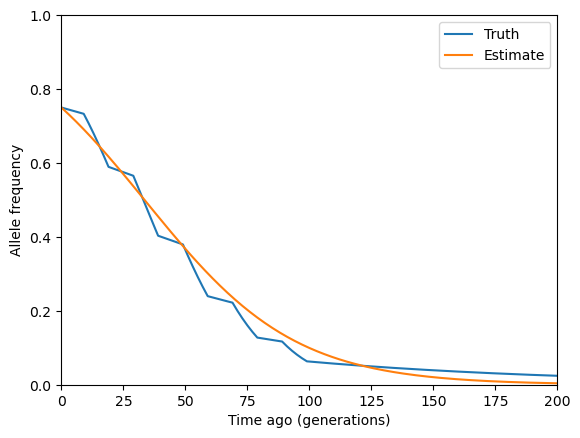

In [205]:
AB = [3.,np.inf]
ibd = sum(ibdlen>=AB[0])
se = minimize_scalar(
    chi2_isweep,
    args=(p,Ne,N,(ibd,),AB),
    bounds=(0,0.5),
    method='bounded'
).x
print(se)

abc = walk_variant_backward_tv(s_s,g_s,p,Ne,random_walk=False)
plt.plot(range(len(abc[0])),abc[0],label='Truth')
plt.ylim(0,1)

abc = walk_variant_backward(se,p,Ne,random_walk=False)
plt.plot(range(len(abc[0])),abc[0],label='Estimate')

plt.xlim(0,200)

plt.xlabel("Time ago (generations)")

plt.ylabel("Allele frequency")

plt.legend()

# plt.savefig('timevar.png')

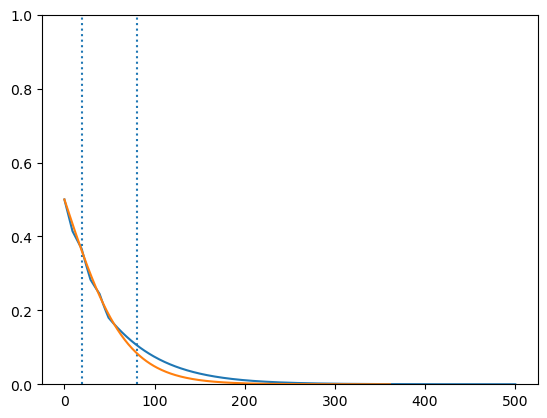

In [98]:
p=0.5
abc = walk_variant_backward_tv(s_s,g_s,p,Ne,random_walk=False)
plt.plot(range(len(abc[0])),abc[0])
plt.ylim(0,1)
plt.axvline(20,linestyle='dotted')
plt.axvline(80,linestyle='dotted')

# abc = walk_variant_backward(s_s[0],p,Ne,random_walk=False)
# plt.plot(range(len(abc[0])),abc[0])

# abc = walk_variant_backward(np.mean(s_s),p,Ne,random_walk=False)
# plt.plot(range(len(abc[0])),abc[0])

abc = walk_variant_backward(se,p,Ne,random_walk=False)
plt.plot(range(len(abc[0])),abc[0])

# plt.xlim(0,100)

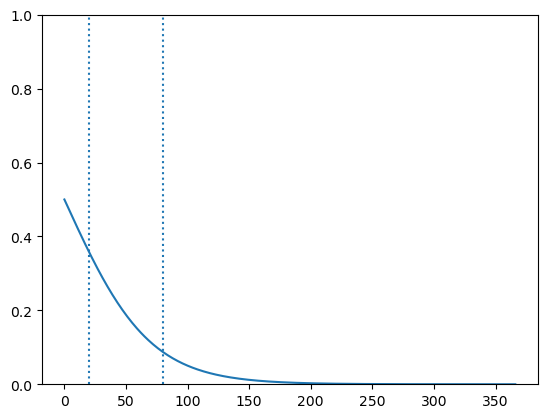

In [67]:
p=0.5

plt.ylim(0,1)
plt.axvline(20,linestyle='dotted')
plt.axvline(80,linestyle='dotted')